# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("../input/haberman.csv/haberman.csv")


In [2]:
# (Q) how many data-points and features?
print (haberman.shape)

(305, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
print(haberman.head(3))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1


In [5]:
#(Q) How many data points for each class are present? 


haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#haberman is a imbalanced dataset as the number of data points are 225 and 81.

1    225
2     80
Name: status, dtype: int64

# (3.2) 2-D Scatter Plot

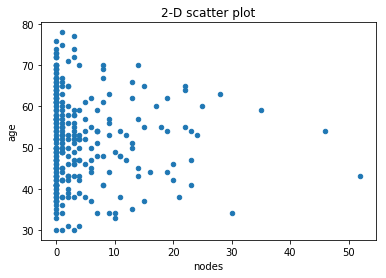

In [6]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='nodes', y='age') ;
plt.title('2-D scatter plot')

plt.show()

#cannot make much sense out it. 

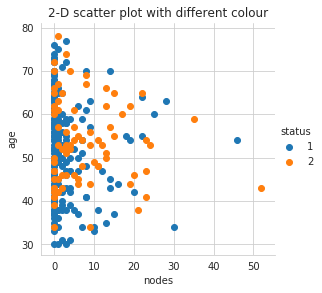

In [7]:
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title('2-D scatter plot with different colour')


plt.show();


**Observation:**
1.In this scatter plot we can see blue dots represent survival more than 5 years and orange dots represent survival less than 5 years.

## 3D Scatter plot



#  (3.3) Pair-plot

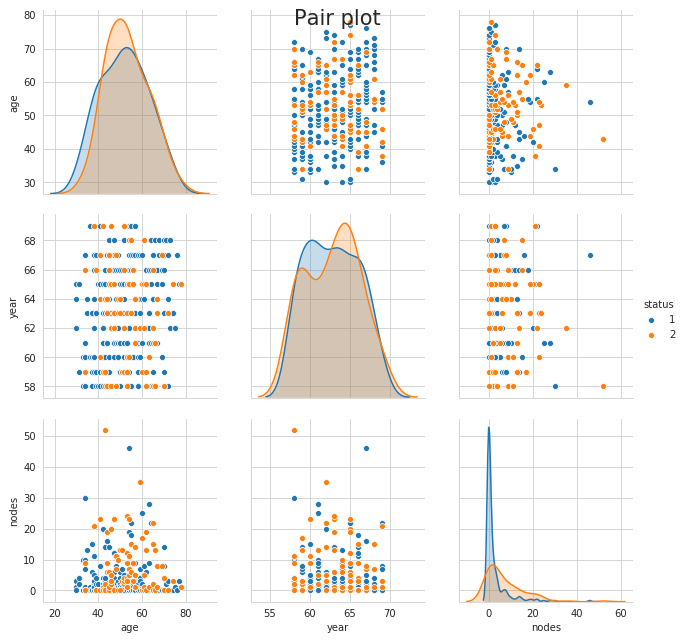

In [8]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3,vars=['age','year','nodes']);
plt.suptitle('Pair plot', fontsize = 21)
plt.show()


**Observations**
1. Here we can see age and nodes ploting are better than other plots because the remaining plots are mostly overlapping on each other.


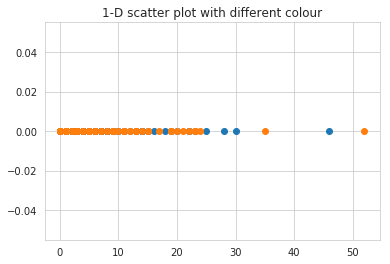

In [9]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of nodes
import numpy as np
haberman_1 = haberman.loc[haberman["status"] ==1];
haberman_2 = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o')
plt.title('1-D scatter plot with different colour')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.


Observation:

1. Here you can see the data of short survive is mostly overlapping on long survive data.So we are unable to conclude on 1D scatter plot

# (3.4) Histogram, PDF, CDF

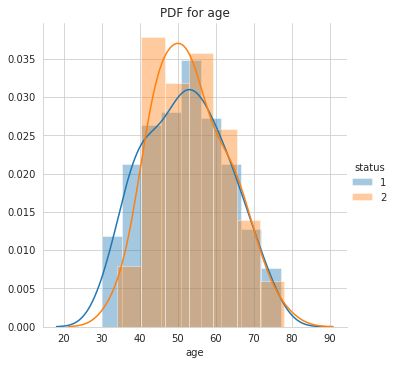

In [10]:
#PDF (Probability Density Function):
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF for age')

plt.show();



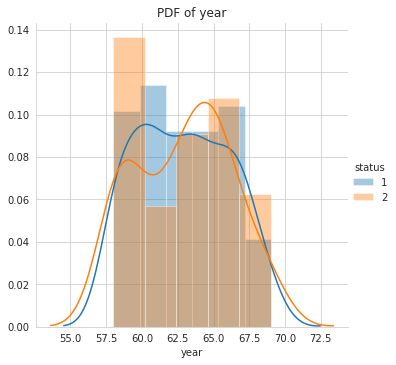

In [11]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('PDF of year')

plt.show();

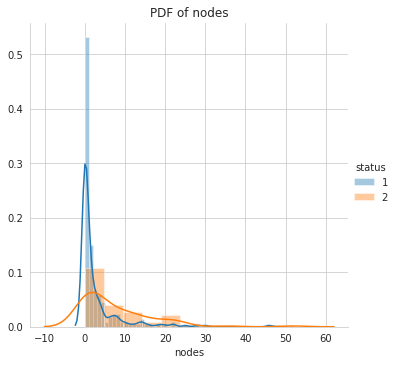

In [12]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('PDF of nodes')

plt.show();

Observation:

Here we observed that people survived long if they have less nodes. But it is still hard to classify but it is best data among all 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 1.0, 'PDF of long survival')

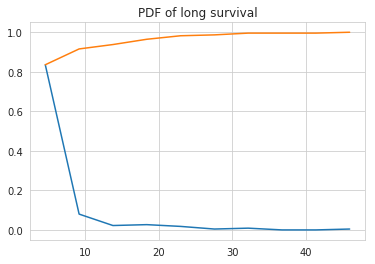

In [13]:

# Need for Cumulative Distribution Function (CDF)
#CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of  survival status

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('PDF of long survival')




Observation:

1.There is 85% of long survival chances if nodes are <5. If nodes increases > 40 100% of people have less chance of survive.
therefore if number of nodes increases survival chances also decreases

[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


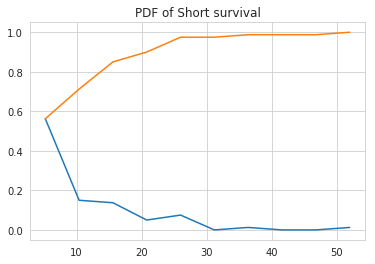

In [14]:

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF of Short survival')


plt.show();

Observation:

1.In short survival nearly 55% of people are less than 5 nodes.  If nodes increases > 40 100% of people have less chance of survive.

# (3.5) Mean, Variance and Std-dev

In [15]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_1["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_1["nodes"],50)));
print(np.mean(haberman_2["nodes"]))


print("\nStd-dev:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))






Means:
2.7911111111111113
3.0
7.525

Std-dev:
5.857258449412131
9.165117293302908


Observation:

1.Here you can observe long survive mean is 2.79 and the mean of short survive is 7.45. 

2.So the probability of less survive is more in data.

3.standard deviation of long survive is less compared to standard deviation of short survive is more, means the spread of short survive is more

# (3.6) Median, Percentile, Quantile, IQR, MAD

In [16]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_1["nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_1["nodes"],50)));
print(np.median(haberman_2["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))




Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.    1.    4.   11.25]

90th Percentiles:
8.0
20.10000000000001

Median Absolute Deviation
0.0
5.930408874022408


Observation:

1.median shows that the average nodes in long survival is 0 and for short survival  is 4. ie, Patients who have average 4 nodes have short survival 

2.In long survival 50th% of nodes are 0. and 75th% of people have less than 3 nodes.

3.In short survival 25th% of people have 1 nodes and 50th% of people have 4 nodes and 75th% of people have minimum 11 nodes.

4.At 90th% the long survival have 8 nodes and short survival have 20 nodes 

# (3.7) Box plot and Whiskers

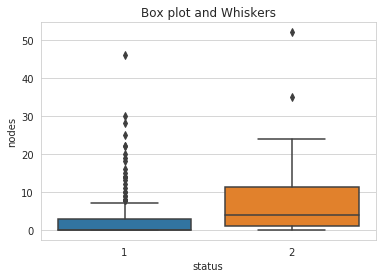

In [17]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box plot and Whiskers')
plt.show()

Observation:

1.In long survive box 25th% and 50th% are same and threshold is 0 to 7 nodes

2. short survive of 50th% of nodes same as 75th% of long survive

3.threshold for short survive is 0 to 25 nodes and 25th% is 1 node and 75th% is 12 nodes

4.So,if nodes between 0–7 have chances of error as short survival plot is also lies in it.
That is 50% error for Short survival status
5.most of short survivals are above 12 nodes


# (3.8) Violin plots

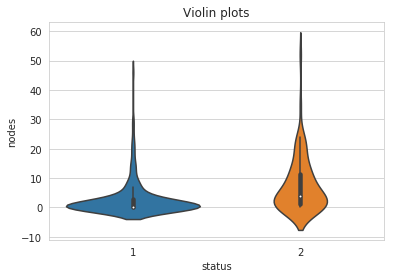

In [18]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, height=7)
plt.title('Violin plots')
plt.show()

Observation:

1.In violin plot we observed that for long survive density is more near to 0 node and in violin2 short survival density more from 0 to 20

# (3.11) Multivariate probability density, contour plot.


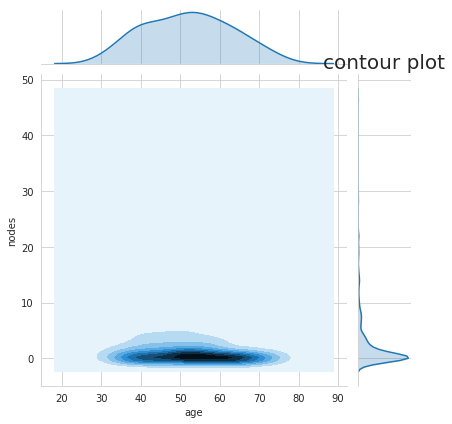

In [19]:
#2D Density plot, contour-plot

sns.jointplot(x="age", y="nodes", data=haberman_1, kind="kde");
plt.title('contour plot',loc='center',fontsize='20')
plt.show();


Observation:

1. 2D density plot for long survival using x-axis as age and y-axis as nodes 

2. In long survival the age between 45 to 60 nodes from 0 to 2 

3.the dark area have major density as the area is getting lighter 

CONCLUSION:

you can diagnose the Cancer using Haberman’s Data set with the help of  data analysis techniques and by using various Python libraries.